<a href="https://colab.research.google.com/github/king80139/Parrot2020_Spring_Competition/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%A1%9C%EB%93%9C%2C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%ED%95%A0%2C_%EB%AA%A8%EB%8D%B8%EB%A7%81%2C_%ED%95%99%EC%8A%B5_%EB%B0%8F_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 분류 학습 맛보기

## 시작 전 VGG모델 성능 보기

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16
import numpy as np


# 텐서플로우 백엔드 케라스에서 VGG16모델을 불러옵니다. 이는 별다른 조작 없이 불러왔기에 기존에 학습되어있는 바가 담겨있습니다.
model  = VGG16()

# 모델의 구조를 파악하기 위해 summary를 프린트합니다.
print(model.summary())
print("----------------------------\n")

# 예측하고 싶은 이미지파일을 불러오고, 224*224로 사이즈를 변환해줍니다. (VGG모델이 224*224 크기의 input을 받습니다.)
image = load_img("/content/drive/My Drive/Colab Notebooks/2ndparrot/2020_parrot_dataset/2020_parrot_dataset/NewSet/train/raccoon/002c3a60a6c763cdb5.jpg", target_size = (224,224))

# 해당 이미지를 numpy array로 변환해줍니다. 이로써 224*224*3(RGB니까)개의 픽셀값이 담긴 배열이 생성됩니다.
image = img_to_array(image)

# 해당 이미지의 배열의 차원을 3차원에서 4차원으로 늘려줍니다. 이로써 1개의, height가 224이고, width가 224이며, color channel이 3인 4차원의 배열이 생성됩니다.
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# 이 이미지를 preprocess_input이라는 위에서 import 한 함수에 넣어줘 VGG 모델에 맞는 input data의 형식으로 변환해줍니다. (추측)  <-- preprocess_input() 함수 기능 알아볼 것!
image = preprocess_input(image)

# preprocess_input()의 역할을 알기 위해 이 결과값을 프린트해봅니다. 결과를 보니
print(image)
print("\n")
h_range, w_range, RGB_range = np.random.randint(0,224), np.random.randint(0,224), np.random.randint(0,3)
RGB = "B" if RGB_range == 1 else "G" if RGB_range == 2 else "R"
# 결과값의 랜덤한 height, width의 스팟의 랜덤한 색채널의 픽셀값을 프린트해보겠습니다.
print("height가 '"+str(h_range)+"'이고, width가 '"+str(w_range)+"'인 스팟의 '"+RGB+"'채널의 픽셀값은 : " + str(image[0][h_range][w_range][RGB_range]) + "\n")
# 이 픽셀값을 보시면 알겠지만 정규화는 안되어있는것을 볼 수 있습니다. 정규화가 꼭 필요한 것인지는 의문입니다.
print("----------------------------\n")

# 해당 이미지의 배열을 바탕으로 VGG모델이 이 사진이 어떤 카테고리에 속할지 예측시킵니다.
yhat = model.predict(image)

# 결과값이 어떤 형태로 도출되는지 보기 위해 프린트 해봅니다. 프린트 해보니 [[결과값들~~~~~]] 식으로 나옵니다. 
# 앞서 불러온 VGG16모델의 최상단 층의 노드가 1000개이니, 결과값도 1000개가 나옵니다.
# 이는 1000개의 확률로, 어떤 카테고리에 속할 확률을 1000개 나온것이라고 생각됩니다.
print(yhat)
print("----------------------------\n")

# 그 결과값을 사람이 알아들을 수 있도록 decode_predictions라는 함수를 사용합니다.(추측)  <-- decode_predictions() 함수 기능 알아볼 것!
label = decode_predictions(yhat)

# decode_predictions() 이 무슨 역할을 하는지 알기위해 그 결과를 프린트 해줍니다.
# 결과값은 해당 이미지의 대상이 속할 카테고리와 그 확률을 상위 5개로 줄여서 보여줍니다.  
# 아래와 같이 표시됩니다.
# [('카테고리넘버', '속할 카테고리_1', '확률'),('카테고리넘버', '속할 카테고리_2', '확률'),('카테고리넘버', '속할 카테고리_3', '확률'),('카테고리넘버', '속할 카테고리_4', '확률'),('카테고리넘버', '속할 카테고리_5', '확률')]
print(label)
print("----------------------------\n")

# 속할 확률이 가장 높은 카테고리를 표시해줍니다.
label = label[0][0]
print('%s(%.2f%%)'%(label[1],label[2]*100))

553467904/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

OSError: ignored

# 거인의 어깨 빌리지 않기

## VGG16모델 직접 쌓아보기

블로그나 책자등에서 쏘개하는 VGG!6모델의 구조를 완벽하진 않지만, 최대한 구현해보기 위해 층을 직접 쌓아보았습니다.  
**<U>직접 층을 쌓는 방법은 그냥 가져다 쓰는 것 보다 해당 모델의 구조를 더 잘 이해하고, 사용법을 더 잘 이해할 수 있을 것이라는 기대를 줬습니다.</U>**  
16개의 hidden layer로 이루어진 VGG16모델은 큰 convolution filter보다 작은 convolution filter를 여러번 적용했을 때 그 성능이 더 좋다는 주장과 함께 소개되었으며,  
현재 GoogleNet보다 더 많이 사용한다 합니다.  
하지만 층이 깊은 만큼 학습해야하는 parameter수도 많고, 그로 인해 학습속도가 느리다는 단점이 있습니다.  

그럼에도 불구하고 일단 많이 소개되었기도 하고, 구조 설계가 많이 나와있어 이 모델을 먼저 선택했습니다.

In [0]:
# VGG16모델의 구조를 이해하기 위해 직접 쌓아봤습니다.

import tensorflow as tf

# 기본적인 데이터셋
num_classes = 8          # 데이터셋 카테고리 수
#file_dir


# VGG16모델 쌓기
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape = (64, 64, 3), strides = (1,1), padding = "same", activation = "relu"))  # 1층 :input_data 크기는 224*224, 64개의 3*3*3(RGB) Conv 필터, 제로패딩, ReLU 활성함수적용
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation = "relu"))           # 2층 :64개의 3*3*3(RGB) Conv 필터, 제로패딩, ReLU 활성함수적용
model.add(tf.keras.layers.MaxPool2D())                                                                                            # Maxpooling 으로 112*112*64 의 feature map이 만들어짐.

model.add(tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation = "relu"))          # 3층 :128개의 112*112* feature map 생성.
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation = "relu"))          # 4층 :128개의 112*112* feature map 생성.
model.add(tf.keras.layers.MaxPool2D()) 

model.add(tf.keras.layers.Conv2D(256, (3, 3), padding = "same", activation = "relu"))          # 5층
model.add(tf.keras.layers.Conv2D(256, (3, 3), padding = "same", activation = "relu"))          # 6층
model.add(tf.keras.layers.Conv2D(256, (3, 3), padding = "same", activation = "relu"))          # 7층
model.add(tf.keras.layers.MaxPool2D()) 

#model.add(tf.keras.layers.Conv2D(512, (3, 3), padding = "same", activation = "relu"))          # 8층
#model.add(tf.keras.layers.Conv2D(512, (3, 3), padding = "same", activation = "relu"))          # 9층
#model.add(tf.keras.layers.Conv2D(512, (3, 3), padding = "same", activation = "relu"))          # 10층
#model.add(tf.keras.layers.MaxPool2D()) 

#model.add(tf.keras.layers.Conv2D(512, (3, 3), padding = "same", activation = "relu"))          # 11층
#model.add(tf.keras.layers.Conv2D(512, (3, 3), padding = "same", activation = "relu"))          # 12층
#model.add(tf.keras.layers.Conv2D(512, (3, 3), padding = "same", activation = "relu"))          # 13층
#model.add(tf.keras.layers.MaxPool2D())  

model.add(tf.keras.layers.Flatten())                                                           # 14층

model.add(tf.keras.layers.Dense(4096, activation = 'relu'))                                    # 15층
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4096, activation = 'relu'))                                    # 16층
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))                          # outcome층

model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])    # 찾아본 바로는 VGG16모델이 최적화 함수를 sgd를 사용한다길래 이를 차용했습니다.

model.summary() 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 256)       2

## 이미지 데이터 로딩하기
이미지 데이터를 가져와 배열화한 다음, 훈련데이터와 훈련라벨, 예측데이터와 예측라벨로 나누는 것을 구현하는 것을 시도했습니다.  
다만 속도를 조금 빠르게 하기 위해 데이터를 증강하지 않고, 기본적으로 주어진 train데이터로 시도했습니다.  
이는 ImageDataGenerator를 사용해 빠르게 지정할 수 있었겠지만, 그 메커니즘을 제대로 이해하지 못해 오류만 자꾸 나와서, 일단 직접적으로 이미지 데이터를 불러들이고, 넘파이 배열로 바꾸는 식으로 무식하지만 확실한 방법으로 데이터를 로딩해 봤습니다.

In [0]:
import os
import numpy as np
from tqdm import tqdm
import cv2

os.chdir("/content/drive/My Drive/Colab Notebooks/2ndparrot/2020_parrot_dataset/2020_parrot_dataset/")
list_classes = ["bear","bird","cat","deer","dog","raccoon","rat","seal"]

class_names_label = {class_name:i for i, class_name in enumerate(list_classes)}

nb_classes = len(list_classes)

IMAGE_SIZE = (224, 224)

def load_data():
    Datasets = ["./train/", "./test"]
    output = []
    e = 1

    for dataset in Datasets:

        images = []
        labels = []

        print("Loading from {}".format(dataset))
        if dataset == "./train/":
            for folder in os.listdir(dataset)[1:-2]:
            
                label = class_names_label[folder]
                print(folder)
                print(label)

                for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                    try:

                        img_path = os.path.join(os.path.join(dataset, folder), file)

                        image = cv2.imread(img_path)
                        image = cv2.resize(image, IMAGE_SIZE)

                        images.append(image)
                        
                        labels.append(label)
                    except:
                        e += 1
                        print("빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나")
                        pass
                
        else :
            for file in tqdm(os.listdir(dataset)):
                try:
                    img_path = os.path.join(dataset, file)

                    image = cv2.imread(img_path)
                    image = cv2.resize(image, IMAGE_SIZE)

                    images.append(image)
                
                except:
                    e += 1
                    print("빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나")
                    pass
                
        images = np.array(images, dtype = "float32")
        if dataset == "./train/":
            labels = np.array(labels, dtype = "float32")
            output.append((images, labels))
        else:
            output.append(images)
    
    print("총 " + str(e) + "개의 에러.")
    print("데이터 로드 완료")
    print(str(len(output[0][0])) + "개의 훈련데이터")
    print(str(len(output[0][1])) + "개의 훈련라벨")
    print(str(len(output[1])) + "개의 예측데이터")
    return output

    
((x_train, y_train),(x_test)) = load_data()

#import pickle
#with open("Augmented_Dataset.pickle", "wb") as fw:
#    pickle.dump(((x_train, y_train),x_test), fw)

  2%|▏         | 23/1191 [00:00<00:05, 227.69it/s]

Loading from ./train/
raccoon
5
빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나
빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나


 18%|█▊        | 212/1191 [00:00<00:04, 222.67it/s]

빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나


 34%|███▎      | 400/1191 [00:01<00:03, 233.23it/s]

빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나
빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나


 42%|████▏     | 501/1191 [00:02<00:02, 230.33it/s]

빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나
빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나


 57%|█████▋    | 679/1191 [00:02<00:02, 248.77it/s]

빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나
빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나
빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나


 67%|██████▋   | 801/1191 [00:03<00:01, 230.78it/s]

빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나


  0%|          | 0/1275 [00:00<?, ?it/s]

빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나
dog
4


 13%|█▎        | 166/1275 [00:00<00:04, 231.47it/s]

빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나


 28%|██▊       | 359/1275 [00:01<00:03, 234.73it/s]

빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나


 40%|███▉      | 504/1275 [00:02<00:03, 232.40it/s]

빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나


 59%|█████▊    | 749/1275 [00:03<00:02, 241.31it/s]

빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나
빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나


 87%|████████▋ | 1110/1275 [00:04<00:00, 231.99it/s]

빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나
빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나


  2%|▏         | 22/1285 [00:00<00:05, 220.00it/s]

cat
2


  7%|▋         | 95/1285 [00:00<00:05, 231.43it/s]

빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나
빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나
빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나


 37%|███▋      | 481/1285 [00:02<00:03, 244.69it/s]

빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나
빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나
빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나
빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나
빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나


 54%|█████▍    | 698/1285 [00:02<00:02, 228.76it/s]

빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나
빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나


 66%|██████▌   | 844/1285 [00:03<00:01, 236.75it/s]

빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나


 73%|███████▎  | 940/1285 [00:04<00:01, 233.50it/s]

빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나


 86%|████████▋ | 1109/1285 [00:04<00:00, 235.26it/s]

빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나


  2%|▏         | 23/1232 [00:00<00:05, 228.66it/s]

seal
7
빈 파일이거나, OpenCV가 불러올 수 없는 확장자거나


  4%|▍         | 48/1232 [00:00<00:05, 232.78it/s]

## 직접 훈련데이터셋으로 만든 데이터를 파일로 저장하고 싶었습니다.
그런데 용량이 커서 번번히 실패했습니다. 위로 부탁드립니다.

In [0]:
np.savez_compressed('/content/drive/My Drive/Colab Notebooks/2ndparrot/2020_parrot_dataset/2020_parrot_dataset/NewSetArray.npz',
                    x_train = x_train, y_train = y_train, x_test = x_test
)


# 결국 거인의 어깨를 빌리기로 했습니다.

## 데이터 증강
데이터 증강을 시도했습니다.  
분명 반복문을 통해 사진당 10번 증강을 시도하라 했는데 왜인지 6개씩 정도만 됐습니다.  
컴퓨터가 사춘기인지 말을 안듣습니다.  


그리고 이미지 데이터들 중 노이즈가 정말 많습니다.  
예를 들어 열수 없는 확장자거나, 불러들일 수 없는 파일 등....
그래서 try except 문으로 오류는 건너띄도록 했습니다.  
이게 좋은 선택일지는 모르겠습니다.....

In [0]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/2ndparrot/2020_parrot_dataset/2020_parrot_dataset")
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tqdm import tqdm

tf.keras.backend.clear_session()
IDG = ImageDataGenerator(                               # ImageDataGenerator로 불러올 이미지 데이터에 대해 다음 옵션과 같은 작업을 수행해 줍니다.
    rotation_range = 90,                                    # 90도까지 회전할 수 있도록 합니다.
    width_shift_range = 0.1,                                # 너비의 0.1 비율 정도만큼을 움직일수 있도록 설정해줍니다.
    height_shift_range= 0.1,                                # 높이의 일정 비율만큼을 움직일 수 있게 합니다.
    brightness_range = [0.4 , 1],                           # 밝기를 현재 1이라 했을 때 0~1 사이의 값으로 밝기를 조절합니다.
    zoom_range = [0.5,0.5],                                 # 현재 이미지로부터 1-min, 1+max 만큼 zoom in zoom out 하도록 설정해줍니다.
    horizontal_flip = True,                                 # 상하반전을 할 수 있도록 설정합니다.
    vertical_flip = True,                                   # 좌우반전을 할 수 있도록 설정해줍니다.
    data_format = "channels_last")                          # 출력 데이터의 shape가 (개수, height, width, RGB channel) 순서가 되도록 합니다.

for animal in list_classes:
    animal_dir = os.path.join("./train/", animal)
    augmented_dir = os.path.join("./train/augmented",animal)        # augmented라는 폴더에 증강된 파일들이 들어가도록 경로를 지정해줍니다.

    print("현재 " + animal + " 폴더에 총 " + str(len(os.listdir(animal_dir))) + "개의 데이터가 있습니다.\n")
    
    for file_name in tqdm(os.listdir(animal_dir), desc = "데이터 증강중..."):       # tqdm이라는 라이브러리로 진행상황을 표시하도록 했습니다. (언제까지 기다려야할지 몰라서...)
        try:
            img = load_img(os.path.join(animal_dir,file_name))                   # 이미지파일을 불러온 후    
            arrayed = img_to_array(img)                                          # 배열화 하고,
            arrayed = arrayed.reshape((1,) + arrayed.shape)                      # shape을 바꿔준 다음,

            i = 0

            for batch in IDG.flow(arrayed, batch_size = 1, save_to_dir = augmented_dir,
                                save_prefix = animal, save_format = "PNG"):      # 배열과 shape을 바꾼 파일을 위에서 정의한 ImageDataGenerator로 변형시켜줍니다.
                i += 1  
                if i > 10:                                                       # 이 작업을 사진 당 10번 하도록 설정합니다.
                    break
        except :
            continue

    print("이제 " + animal + " 카테고리에 총 " + str(len(os.listdir(augmented_dir))) + "개의 데이터가 추가되었습니다.")  # 그런데 막상 해보니 사진당 거의 6개씩만 증강됐더군요....
    print("---------------------------------------------")
```

인위적으로 증강시킨 데이터들을 NewSet이라는 폴더를 직접 만들어 그 안에 train 폴더 안에 있던 데이터들 , 그리고 augmented폴더에 새로 증간된 데이터들을 bear, bird, cat, deer, dog, raccoon, rat, seal에 맞게로 집어넣었습니다. 한 사진당 약 6개씩 증강되어 train 데이터에는 총 65000개 정도의 데이터가 있습니다.  


현재 NewSet폴더의 데이터는 zip파일로 저장해둔 상태입니다. 

## 데이터 로딩 2
ImageDataGenerator이라는 메소드를 사용해 편리하게 데이터를 불러들여와봅니다.  
다만 이번에는 전략을 달리했습니다.

### 전략 수정
원래 저는 test데이터에 라벨이 없어 ImageDataGenerator를 사용하지 않는 방향으로 가려 했습니다.  

그러나, 어리석음을 깨달았습니다.  
영욱님께서 validation set의 존재를 깨닫게 해주셨기 때문이죠.  
그래서 이렇게 해볼 생각입니다.  
NewSet에서 train data를 ImageDataGenerator를 통해 불러들이면서  
7:3~8:2 비율로 validation set를 만들것입니다.   
즉 real_train 데이터와 validation 데이터로 나누는 거죠.

그리고 위에서 만든 VGG16모델에 real_train 데이터를 통해 학습을 시키고,  
validation의 데이터를 통해 라벨을 예측하도록 하고,  
실제 라벨과 비교해 validation score를 내볼 것입니다.  

이후, 괜찮은 validation score을 내는 모델로 성능을 향상시킨 후 test 데이터에 적용시켜 예측시킨 다음 Kaggle에 제출할 계획입니다.  

따라서 validationn score를 높이면서 under/overfitting을 예방하는 다양한 방법론들을 찾고 구현하는데 많은 시간을 쏟고,  
그 이후에 test데이터를 얼른 예측시킨 다음 이번 competition을 마치고자 합니다.


### 데이터 로딩 상세

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/2ndparrot/2020_parrot_dataset/2020_parrot_dataset")

datagen = ImageDataGenerator(                                                   # 위 셀에서 정의한 것과 같이 ImageDataGenerator를 정의합니다.
                                                                                # 다만, 이번에는 데이터를 로딩하기 위함이니 이미 실행한 옵션은 지정하지 않습니다.    
    rescale = 1./255,                   # 불러올 이미지 데이터의 픽셀값을 정규화하도록 합니다.
    validation_split = 0.25,            # 불러올 데이터들 중 지정한 비율만큼을 검증데이터로 지정하도록 합니다.
    data_format = "channels_last")      # 출력 데이터의 shape가 (개수, height, width, RGB channel) 순서가 되도록 합니다. 

test_datagen = ImageDataGenerator(rescale = 1./255)     # 테스트 데이터의 경우, 픽셀값 정규화만 해주면 됩니다.

training_set = datagen.flow_from_directory('./NewSet/train',                    # 지정한 경로에서 폴더의 상하위구조를 파악해 데이터를 불러들이는 flow_from_directory 메소드를 사용합니다.
                                           target_size = (64, 64),            # 데이터들의 크기를 224*224로 resize해주고
                                           batch_size = 128,                    # 학습할때의 미니배치의 크기를 지정합니다. 
                                           class_mode = 'categorical',          # 목표가 다중 카테고리를 예측하는 것이니 categorical호 classmode를 설정합니다.
                                           shuffle = True,                      # 데이터가 랜덤하게 뽑히도록 설정합니다.
                                           seed = 2020,                         # 하지만, 매번 실행할때마다 결과가 달라지는 것을 막기 위해 시드값을 설정합니다.
                                           subset = "training")                 # training_set이라는 변수에 담긴 데이터들은 학습데이터로 쓰이도록 training이라는 subset으로 지정해줍니다.

valid_set = datagen.flow_from_directory('./NewSet/train',
                                        target_size = (64, 64),
                                        batch_size = 128,
                                        class_mode = 'categorical',
                                        shuffle = True,
                                        seed = 2020,    
                                        subset = "validation")                  # validation_set이라는 변수에 담긴 데이터들은 검증데이터로 쓰이도록 validation이라는 subset으로 지정해줍니다.







Found 51774 images belonging to 8 classes.
Found 17253 images belonging to 8 classes.


## 데이터 학습

## 아아.... 그는 갔습니다...
지금 train 데이터에 빈 파일이든 에러를 일으키는 파일 (저같은 경우 GIF파일) 들 떄문에...  
이럴거면 초장에 그러지.... 근 네시간을 버텼는데.....

In [0]:
history = model.fit(training_set,
                    steps_per_epoch = training_set.samples/ training_set.batch_size,
                    epochs = 5, 
                    validation_data = valid_set,
                    validation_steps = valid_set.samples/ valid_set.batch_size,
                    verbose = 1)

Epoch 1/5
 11/404 [..............................] - ETA: 9:44:56 - loss: 2.0788 - accuracy: 0.1314

## Loss와 Accuracy 확인하기

In [0]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
loss = history.history["loss"]

epochs = range(len(acc))

plt.figure(figsize = (10, 6))
plt.plot(epochs, acc, label = "accuracy")
plt.plot(epochs, loss, label = "loss")
plt.title("accuracy and loss")
plt.legend()

plt.show()


KeyError: ignored

# 오늘 회의할때....

아무래도 제가 잘때 여러분들이 회의하실 것 같아 여기다가 먼저 오늘 발표할 때 얘기 할 만한 것을 제시해보겠습니다.

- 한 주간 각자 진행해 온 것들. 스크린샷과 링크를 적극 활용해서 보여주면 좋을 것 같습니다.  
제 경우 데이터증강에 성공했고, 이를 바탕으로 VGG16모델을 직접 쌓아본 후, 모델에 학습을 시키는 것이 목표였습니다.  
하지만 보시다 시피 학습과정에서 시간이 너무나 오래 걸린다는 점과, train, test 데이터 내의 노이즈들로 인해 시행착오만을 겪었을 뿐 학습성과가 나진 않았습니다. 

- 제가 캐글이나 이미 공유된 곳에서 진행했어야 더 편하셨을텐데 또 생각없이 하다가 다른 노트북 켜서 여기서 진행했습니다.... 제거를 발표하실 때는 아마 스크린샷보다는 코랩 링크 타고서 주우욱 설명해주시면 될 것 같습니다.

- 만약 이를 실해해보시고 싶으시다면, **<U>VGG16모델 직접 쌓아보기</U>**, **<U>데이터 로딩 상세</U>**, **<U>데이터 학습</U>** 을 구동시켜보시면 될 것 같습니다. 다만 데이터 경로들은 잘 설정해 주셔야 합니다!

- 오늘 다연씨가 발표하실때 아무래도 그전에 저희 코드를 어느정도 읽고 가셔야 할텐데, 그러려면 시간이 오래 걸리실 것 같아 일단 최대한 설명을 주석과 마크다운으로 넣어놨습니다. 

# 5/20 새로 로딩하고 학습 시켜보겠습니다!
저번에 피드백이 온대로 인풋데이터의 크기를 224에서 64로 줄였습니다.  
64인 이유는 VGG모델처럼 여러 필터를 거치고, 풀링을 거치려면 어느정도 크기는 확보되어야 했기 때문입니다. 그 와중에 크기가 너무 크면 데이터의 크기 문제도 있기에 적당하ㄱ다고 생각 되는 64정도로 정했습니다.   


input shape를 64*64 정도로 맞췄기에 필터와 풀링의 수를 조절했습니다.  
이는 위에 VGG16모델 직접 쌓아올리기에서 확인하실 수 있습니다.  




In [0]:
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

os.chdir("/content/drive/My Drive/Colab Notebooks/2ndparrot/2020_parrot_dataset/2020_parrot_dataset")

train_datagen = ImageDataGenerator(                               # ImageDataGenerator로 불러올 이미지 데이터에 대해 다음 옵션과 같은 작업을 수행해 줍니다.
            rotation_range = 25,                                    # 25도까지 회전할 수 있도록 합니다.
            width_shift_range = 0.1,                                # 너비의 0.1 비율 정도만큼을 움직일수 있도록 설정해줍니다.
            height_shift_range= 0.1,                                # 높이의 일정 비율만큼을 움직일 수 있게 합니다.
            brightness_range = [0.4 , 1],                           # 밝기를 현재 1이라 했을 때 0~1 사이의 값으로 밝기를 조절합니다.
            zoom_range = [0.3,0.3],                                 # 현재 이미지로부터 1-min, 1+max 만큼 zoom in zoom out 하도록 설정해줍니다.
            horizontal_flip = True,                                 # 상하반전을 할 수 있도록 설정합니다.
            vertical_flip = True,                                   # 좌우반전을 할 수 있도록 설정해줍니다.
            validation_split = 0.25,                                # 불러올 데이터들 중 지정한 비율만큼을 검증데이터로 지정하도록 합니다.
            data_format = "channels_last")                          # 출력 데이터의 shape가 (개수, height, width, RGB channel) 순서가 되도록 합니다. 

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.25)     # 테스트 데이터의 경우, 픽셀값 정규화만 해주면 됩니다.
test_datagen = ImageDataGenerator(rescale = 1./255)     # 테스트 데이터의 경우, 픽셀값 정규화만 해주면 됩니다.


batch_size = 128
target_size = (64,64)
iterations = 5


training_set = train_datagen.flow_from_directory('./train',                    # 지정한 경로에서 폴더의 상하위구조를 파악해 데이터를 불러들이는 flow_from_directory 메소드를 사용합니다.
                                           target_size = target_size,            # 데이터들의 크기를 224*224로 resize해주고
                                           batch_size = batch_size,                    # 학습할때의 미니배치의 크기를 지정합니다. 
                                           class_mode = 'categorical',          # 목표가 다중 카테고리를 예측하는 것이니 categorical호 classmode를 설정합니다.
                                           shuffle = True,                      # 데이터가 랜덤하게 뽑히도록 설정합니다.
                                           seed = 2020,                         # 하지만, 매번 실행할때마다 결과가 달라지는 것을 막기 위해 시드값을 설정합니다.
                                           interpolation = "nearest",
                                           subset = "training")                 # training_set이라는 변수에 담긴 데이터들은 학습데이터로 쓰이도록 training이라는 subset으로 지정해줍니다.

valid_set = train_datagen.flow_from_directory('./train',
                                        target_size = target_size,
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle = True,
                                        seed = 2020,    
                                        interpolation = "nearest",
                                        subset = "validation")                  # validation_set이라는 변수에 담긴 데이터들은 검증데이터로 쓰이도록 validation이라는 subset으로 지정해줍니다.

x_train, y_train = training_set.next()

history = model.fit(training_set,                                               # fit 함수를 통해 데이터를 학습시켜보겠습니다.
                    steps_per_epoch = training_set.samples/ training_set.batch_size,  # epoch당 step은 training set 샘플 수를 샘플의 바치 크기 만큼, 즉 배치에 담긴 데이터 수만큼 지정해줍니다. 
                    epochs = 50,                                                      # 반복 횟수인 epoch는 50 번 정도로 맞췄습니다.
                    validation_data = valid_set,                                      # 검증데이터는 검증데이터대로 지정해줍니다. 
                    validation_steps = valid_set.samples/ valid_set.batch_size,
                    verbose = 1)                                                      # 이 과ㅏ정을 마친 결과를 history라는 변수에 담아 실해 시킵니다.







Found 7329 images belonging to 8 classes.
Found 2440 images belonging to 8 classes.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/50
58/57 [==============================] - 94s 2s/step - loss: 1.6869 - accuracy: 0.3810 - val_loss: 1.8059 - val_accuracy: 0.3295
Epoch 2/50
58/57 [==============================] - 94s 2s/step - loss: 1.6875 - accuracy: 0.3815 - val_loss: 1.6183 - val_accuracy: 0.4057
Epoch 3/50
58/57 [==============================] - 94s 2s/step - loss: 1.6745 - accuracy: 0.3844 - val_loss: 1.6093 - val_accuracy: 0.4184
Epoch 4/50
58/57 [==============================] - 93s 2s/step - loss: 1.6759 - accuracy: 0.3861 - val_loss: 1.6661 - val_accuracy: 0.3975
Epoch 5/50
58/57 [==============================] - 93s 2s/step - loss: 1.6682 - accuracy: 0.3921 - val_loss: 1.5949 - val_accuracy: 0.4107
Epoch 6/50
58/57 [==============================] - 93s 2s/step - loss: 1.6557 - accuracy: 0.3961 - val_loss: 1.6625 - val_accuracy: 0.3742
Epoch 7/50
58/57 [==============================] - 94s 2s/step - loss: 1.6684 - accuracy: 0.3919 - val_loss: 1.7719 - val_accuracy: 0.3455
Epoch 8/50
58/57 [==

사실 이 과정을 여러번 하느라 4~5번 정도 돌렸는데  
처음 돌렸을 때 accurary는 한 13%정도 나왔습니다.  
지금 여기서 보여주는 accuracy같은 경우는 44%정도 되는데,  
아마 여러번 돌렸더니, model에 학습이 쌓여 accuracy가 올라간 것으로 보입니다.  
만약 이를 그대로 예측시키면 overfitting이 일어날 것을 생각됩니다.  
그리고 아직 데이터를 실시간으로 증강해서 training set에 담는 과정은 실현하지 못했습니다.  
아직 그 과정을 어떻게 해야 하는지 감이 안서네요...

In [0]:
score = model.evaluate(valid_set[0][0], valid_set[0][1], verbose = 1)
score[1]

4/4 [==============================] - 0s 52ms/step - loss: 1.4412 - accuracy: 0.4453


0.4453125

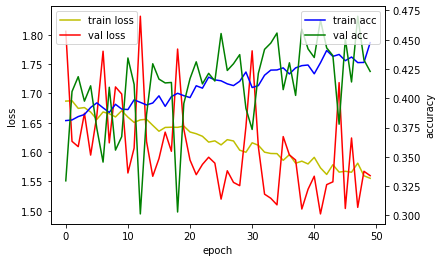

In [0]:
def acc_loss_plot(history):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(history.history['loss'], 'y', label='train loss')
    loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')

    acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
    acc_ax.set_ylabel('accuracy')
    acc_ax.legend(loc='upper right')

    plt.show()

acc_loss_plot(history)

# Transfer Learning

In [0]:
from tensorflow.keras import Input
import matplotlib as aplt
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16
import numpy as np

os.chdir("/content/drive/My Drive/Colab Notebooks/2ndparrot/2020_parrot_dataset/2020_parrot_dataset")

train_datagen = ImageDataGenerator(                               # ImageDataGenerator로 불러올 이미지 데이터에 대해 다음 옵션과 같은 작업을 수행해 줍니다.
            rotation_range = 25,                                    # 25도까지 회전할 수 있도록 합니다.
            width_shift_range = 0.1,                                # 너비의 0.1 비율 정도만큼을 움직일수 있도록 설정해줍니다.
            height_shift_range= 0.1,                                # 높이의 일정 비율만큼을 움직일 수 있게 합니다.
            brightness_range = [0.4 , 1],                           # 밝기를 현재 1이라 했을 때 0~1 사이의 값으로 밝기를 조절합니다.
            zoom_range = [0.3,0.3],                                 # 현재 이미지로부터 1-min, 1+max 만큼 zoom in zoom out 하도록 설정해줍니다.
            horizontal_flip = True,                                 # 상하반전을 할 수 있도록 설정합니다.
            vertical_flip = True,                                   # 좌우반전을 할 수 있도록 설정해줍니다.
            validation_split = 0.25,                                # 불러올 데이터들 중 지정한 비율만큼을 검증데이터로 지정하도록 합니다.
            data_format = "channels_last")                          # 출력 데이터의 shape가 (개수, height, width, RGB channel) 순서가 되도록 합니다. 

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.25)     # 테스트 데이터의 경우, 픽셀값 정규화만 해주면 됩니다.
test_datagen = ImageDataGenerator(rescale = 1./255)     # 테스트 데이터의 경우, 픽셀값 정규화만 해주면 됩니다.


batch_size = 128
target_size = (224,224)
iterations = 5


training_set = train_datagen.flow_from_directory('./train',                    # 지정한 경로에서 폴더의 상하위구조를 파악해 데이터를 불러들이는 flow_from_directory 메소드를 사용합니다.
                                           target_size = target_size,            # 데이터들의 크기를 224*224로 resize해주고
                                           batch_size = batch_size,                    # 학습할때의 미니배치의 크기를 지정합니다. 
                                           class_mode = 'categorical',          # 목표가 다중 카테고리를 예측하는 것이니 categorical호 classmode를 설정합니다.
                                           shuffle = True,                      # 데이터가 랜덤하게 뽑히도록 설정합니다.
                                           seed = 2020,                         # 하지만, 매번 실행할때마다 결과가 달라지는 것을 막기 위해 시드값을 설정합니다.
                                           interpolation = "nearest",
                                           subset = "training")                 # training_set이라는 변수에 담긴 데이터들은 학습데이터로 쓰이도록 training이라는 subset으로 지정해줍니다.

valid_set = train_datagen.flow_from_directory('./train',
                                        target_size = target_size,
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle = True,
                                        seed = 2020,    
                                        interpolation = "nearest",
                                        subset = "validation")                  # validation_set이라는 변수에 담긴 데이터들은 검증데이터로 쓰이도록 validation이라는 subset으로 지정해줍니다.

x_train, y_train = training_set.next()



pre_VGG = VGG16(weights = "imagenet", include_top = False, input_shape = (224,224,3))
pre_VGG.trainable = False





input_tensor = Input(shape=(220,220,3,), dtype='float32', name='input')

additional_model = tf.keras.models.Sequential()
additional_model.add(pre_VGG)
additional_model.add(tf.keras.layers.Flatten())
additional_model.add(tf.keras.layers.Dense(4096, activation='relu'))
additional_model.add(tf.keras.layers.Dense(4096, activation='relu'))
additional_model.add(tf.keras.layers.Dense(4096, activation='relu'))
additional_model.add(tf.keras.layers.Dense(8, activation='softmax'))
 
additional_model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])    # 찾아본 바로는 VGG16모델이 최적화 함수를 sgd를 사용한다길래 이를 차용했습니다.

additional_model.summary()


history = additional_model.fit(training_set,                                               # fit 함수를 통해 데이터를 학습시켜보겠습니다.
                    steps_per_epoch = training_set.samples/ training_set.batch_size,  # epoch당 step은 training set 샘플 수를 샘플의 바치 크기 만큼, 즉 배치에 담긴 데이터 수만큼 지정해줍니다. 
                    epochs = 10,                                                      # 반복 횟수인 epoch는 50 번 정도로 맞췄습니다.
                    validation_data = valid_set,                                      # 검증데이터는 검증데이터대로 지정해줍니다. 
                    validation_steps = valid_set.samples/ valid_set.batch_size,
                    verbose = 1)                                                      # 이 과ㅏ정을 마친 결과를 history라는 변수에 담아 실해 시킵니다.


score = additional_model.evaluate(valid_set[0][0], valid_set[0][1], verbose = 1)
print("the score is ... : " + str(score[1]))



def acc_loss_plot(history):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(history.history['loss'], 'y', label='train loss')
    loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')

    acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
    acc_ax.set_ylabel('accuracy')
    acc_ax.legend(loc='upper right')

    plt.show()

acc_loss_plot(history)


Found 7329 images belonging to 8 classes.
Found 2440 images belonging to 8 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 4096)              102764544 
_________________________________________________________________
dense_5 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_6 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 32776     
Total params: 151,074,632
Trainable 

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/57 [==============================] - 3254s 56s/step - loss: 4.3032 - accuracy: 0.2601 - val_loss: 1.7487 - val_accuracy: 0.3758
Epoch 2/10
58/57 [==============================] - 292s 5s/step - loss: 1.7094 - accuracy: 0.3818 - val_loss: 1.6201 - val_accuracy: 0.4143
Epoch 3/10
58/57 [==============================] - 291s 5s/step - loss: 1.5830 - accuracy: 0.4391 - val_loss: 1.5239 - val_accuracy: 0.4639
Epoch 4/10
58/57 [==============================] - 293s 5s/step - loss: 1.5015 - accuracy: 0.4777 - val_loss: 1.4938 - val_accuracy: 0.4660
Epoch 5/10
58/57 [==============================] - 291s 5s/step - loss: 1.4594 - accuracy: 0.4833 - val_loss: 1.3689 - val_accuracy: 0.5299
Epoch 6/10
58/57 [==============================] - 296s 5s/step - loss: 1.3968 - accuracy: 0.5104 - val_loss: 1.4045 - val_accuracy: 0.5246
Epoch 7/10
58/57 [==============================] - 299s 5s/step - loss: 1.3585 - accuracy: 0.5212 - val_loss: 1.3050 - val_accuracy: 0.5512
Epoch 8/10
58/57 [====

NameError: ignored

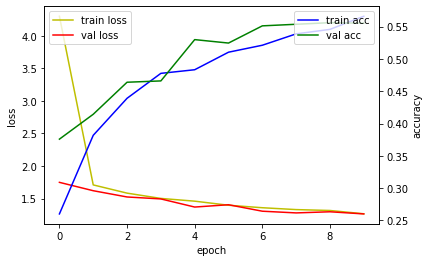

In [0]:
import matplotlib.pyplot as plt
def acc_loss_plot(history):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(history.history['loss'], 'y', label='train loss')
    loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')

    acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
    acc_ax.set_ylabel('accuracy')
    acc_ax.legend(loc='upper right')

    plt.show()

acc_loss_plot(history)